## 1. Importing Libraries

In [1]:
#imports
import numpy as np
import pandas as pd
import keras
import tensorflow as tf
import timeit
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

## 2. Importing data

In [2]:
train = pd.read_csv("../input/fashionmnist/fashion-mnist_train.csv")
test = pd.read_csv("../input/fashionmnist/fashion-mnist_test.csv")

In [3]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3. Reshaping the data, Features and labels(to categorical)

In [6]:
# Reshaping training data
X = train.iloc[:,1:].values.reshape(len(train),28,28,1)
y = train.iloc[:,0].values
y = keras.utils.to_categorical(y,num_classes=10)

In [7]:
print(X.shape)
print(y.shape)

(60000, 28, 28, 1)
(60000, 10)


In [8]:
# Reshapinng the test data
X_test = test.iloc[:,1:].values.reshape(len(test),28,28,1)
y_test = test.iloc[:,0].values
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [9]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000, 10)


## 4. Splitting the train into train and validation set

In [10]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(48000, 28, 28, 1)
(48000, 10)
(12000, 28, 28, 1)
(12000, 10)
(10000, 28, 28, 1)
(10000, 10)


## 5. Normalizing the train and test data

In [12]:
X_train = X_train/255.0
X_val = X_val/255.0
X_test = X_test/255.0
X=X/255.0 # for tuner

## 6. Basic CNN model

In [13]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', # same, p = (f-1)/2, 28*28*64
                activation = 'relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', #28*28*32
               activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2))) # n-f+1, 27*27*32
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation ='softmax'))

model.compile(optimizer = Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [15]:
start=timeit.default_timer()
a=model.fit(X_train,y_train,batch_size = 256,epochs = 50,verbose=1,validation_data=(X_val,y_val),shuffle=False)
stop=timeit.default_timer()

Epoch 1/50
188/188 [==============================] - 3s 14ms/step - loss: 0.6047 - accuracy: 0.7807 - val_loss: 0.3535 - val_accuracy: 0.8739
Epoch 2/50
188/188 [==============================] - 2s 12ms/step - loss: 0.3404 - accuracy: 0.8779 - val_loss: 0.3013 - val_accuracy: 0.8912
Epoch 3/50
188/188 [==============================] - 2s 12ms/step - loss: 0.2840 - accuracy: 0.8987 - val_loss: 0.2820 - val_accuracy: 0.8988
Epoch 4/50
188/188 [==============================] - 2s 13ms/step - loss: 0.2488 - accuracy: 0.9084 - val_loss: 0.2364 - val_accuracy: 0.9178
Epoch 5/50
188/188 [==============================] - 2s 12ms/step - loss: 0.2249 - accuracy: 0.9184 - val_loss: 0.2230 - val_accuracy: 0.9218
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 0.2037 - accuracy: 0.9257 - val_loss: 0.2192 - val_accuracy: 0.9243
Epoch 7/50
188/188 [==============================] - 2s 12ms/step - loss: 0.1879 - accuracy: 0.9322 - val_loss: 0.2128 - val_accuracy: 0.9277

In [16]:
print('Time Taken',stop-start)

Time Taken 121.05550737400006


In [17]:
# print(a.history['accuracy'])
# print(a.history['loss'])
# print(a.history['val_accuracy'])
# print(a.history['val_loss'])

In [18]:
num=len(a.history['accuracy'])
eplist=np.arange(1,num+1,step=1)
eplist=eplist.tolist()

history_df=pd.DataFrame(eplist,columns = ['Epoch'])

history_df['train_acc']=pd.DataFrame(a.history['accuracy'])
history_df['train_loss']=pd.DataFrame(a.history['loss'])
history_df['val_acc']=pd.DataFrame(a.history['val_accuracy'])
history_df['val_loss']=pd.DataFrame(a.history['val_loss'])


In [19]:
history_df

,Epoch,train_acc,train_loss,val_acc,val_loss
0,1,0.780708,0.604663,0.873917,0.353499
1,2,0.877854,0.340362,0.891167,0.301253
2,3,0.898729,0.284016,0.898833,0.282039
3,4,0.908417,0.248813,0.917833,0.236402
4,5,0.918354,0.224883,0.921750,0.222959
5,6,0.925687,0.203713,0.924250,0.219161
6,7,0.932208,0.187858,0.927667,0.212809
7,8,0.938104,0.172766,0.926583,0.216060
8,9,0.942937,0.156226,0.926833,0.225491
9,10,0.947458,0.144537,0.929417,0.224918


## 7. Visualization of Acc vs Epoch

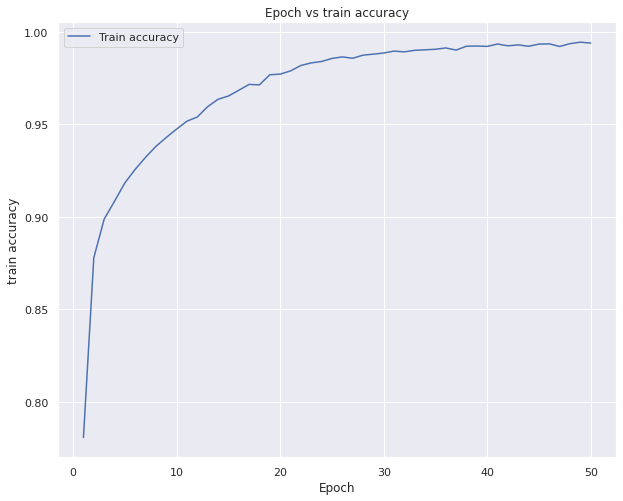

In [20]:
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='train_acc',data=history_df)
plt.title("Epoch vs train accuracy")

plt.xlabel("Epoch")
plt.ylabel("train accuracy")
plt.legend(["Train accuracy"])
plt.show()

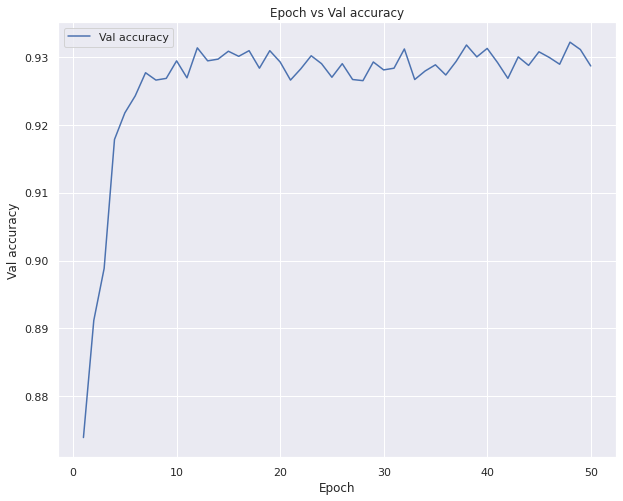

In [21]:
fig= plt.figure(figsize=(10,8))
sns.set(style="darkgrid")
ax=sns.lineplot(x='Epoch',y='val_acc',data=history_df)
plt.title("Epoch vs Val accuracy")

plt.xlabel("Epoch")
plt.ylabel("Val accuracy")
plt.legend(["Val accuracy"])
plt.show()

## 8. Predicting test data

In [22]:
y_pred = model.predict_classes(X_test,verbose = 1)
y_pred = keras.utils.to_categorical(y_pred)
accuracy_cnn = (accuracy_score(y_pred,y_test)) * 100
print("Accuracy on test set: ",accuracy_cnn)

313/313 [==============================] - 1s 2ms/step
Accuracy on test set:  93.08


## 6.1 Basic CNN with callback

In [23]:
model_lr = Sequential()

model_lr.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_lr.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_lr.add(MaxPooling2D(pool_size=(2,2)))
model_lr.add(Dropout(0.25))


model_lr.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_lr.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_lr.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_lr.add(Dropout(0.25))


model_lr.add(Flatten())
model_lr.add(Dense(256, activation = "relu"))
model_lr.add(Dropout(0.25))
model_lr.add(Dense(10, activation = "softmax"))

learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)



model_lr.compile(optimizer = keras.optimizers.Adam(), loss = "categorical_crossentropy", metrics=["accuracy"])

In [24]:
import timeit
start=timeit.default_timer()

b=model_lr.fit(X_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(X_val,y_val),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4551 - accuracy: 0.8333 - val_loss: 0.2871 - val_accuracy: 0.8937
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2996 - accuracy: 0.8907 - val_loss: 0.2518 - val_accuracy: 0.9084
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2591 - accuracy: 0.9044 - val_loss: 0.2498 - val_accuracy: 0.9091
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2311 - accuracy: 0.9140 - val_loss: 0.2238 - val_accuracy: 0.9212
Epoch 5/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2101 - accuracy: 0.9205 - val_loss: 0.2259 - val_accuracy: 0.9211
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1952 - accuracy: 0.9284 - val_loss: 0.2195 - val_accuracy: 0.9222
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1801 - accuracy: 0.9316 - val_loss: 0.2277 - val_accuracy:

## 8.1 Predicting test data

In [25]:
y_pred_lr = model_lr.predict_classes(X_test,verbose = 1)
y_pred_lr = keras.utils.to_categorical(y_pred_lr)
accuracy_cnn_lr = (accuracy_score(y_pred_lr,y_test)) * 100
print("Accuracy on test set: ",accuracy_cnn_lr)

313/313 [==============================] - 0s 1ms/step
Accuracy on test set:  94.11


## 6.2 Leaky Relu with callback

In [26]:

model_leaky = Sequential()

model_leaky.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model_leaky.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model_leaky.add(MaxPooling2D(pool_size=(2,2)))
model_leaky.add(Dropout(0.25))


model_leaky.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_leaky.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model_leaky.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model_leaky.add(Dropout(0.25))


model_leaky.add(Flatten())
model_leaky.add(Dense(256))
model_leaky.add(LeakyReLU(alpha=0.01))
model_leaky.add(Dropout(0.25))
model_leaky.add(Dense(10, activation = "softmax"))


model_leaky.compile(optimizer = keras.optimizers.Adam() , loss = "categorical_crossentropy", metrics=["accuracy"])


In [27]:
import timeit
start=timeit.default_timer()

c=model_leaky.fit(X_train,y_train,batch_size = 32,epochs = 50,verbose=1,validation_data=(X_val,y_val),callbacks=[learning_rate_reduction],shuffle=False)

stop=timeit.default_timer()

Epoch 1/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4539 - accuracy: 0.8349 - val_loss: 0.3055 - val_accuracy: 0.8867
Epoch 2/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2991 - accuracy: 0.8885 - val_loss: 0.2537 - val_accuracy: 0.9047
Epoch 3/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2570 - accuracy: 0.9041 - val_loss: 0.2380 - val_accuracy: 0.9114
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2350 - accuracy: 0.9126 - val_loss: 0.2366 - val_accuracy: 0.9167
Epoch 5/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2110 - accuracy: 0.9217 - val_loss: 0.2254 - val_accuracy: 0.9196
Epoch 6/50
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1931 - accuracy: 0.9281 - val_loss: 0.2292 - val_accuracy: 0.9213
Epoch 7/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1783 - accuracy: 0.9327 - val_loss: 0.2206 - val_accuracy:

## 8.2 Predicting test data

In [28]:
y_pred_leaky = model_leaky.predict_classes(X_test,verbose = 1)
y_pred_leaky = keras.utils.to_categorical(y_pred_leaky)
accuracy_cnn_leaky = (accuracy_score(y_pred_leaky,y_test)) * 100
print("Accuracy on test set: ",accuracy_cnn_leaky)

313/313 [==============================] - 1s 2ms/step
Accuracy on test set:  93.81


# 6.3 - SGD with momentum
model.compile(optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) , loss = "categorical_crossentropy", metrics=["accuracy"])

# 6.4 - Batch normalization 
model.add(BatchNormalization())

https://github.com/kannavdhawan/Neural-Networks-Fashion-MNSIT/blob/master/convolution_neural_network.ipynb

## 6.5 | Keras Tuner
- https://www.tensorflow.org/tutorials/keras/keras_tuner


In [29]:
tf.__version__

'2.3.1'

In [30]:
!pip install keras-tuner

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [31]:
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt

In [32]:
tf.__version__

'2.3.1'

In [33]:
def build_model(hp):  
  model = keras.Sequential([
    Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        input_shape=(28,28,1)
    ),
    Activation(LeakyReLU(alpha=0.01)),
    Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
    ),
    Activation(LeakyReLU(alpha=0.01)),

    Flatten(),
    Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [34]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [35]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [36]:
y_train = np.argmax(y_train, axis=-1)

In [37]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1) # ytrain should be non categorical

Trial 5 Complete [00h 00m 16s]
val_accuracy: 0.831041693687439

Best val_accuracy So Far: 0.9016666412353516
Total elapsed time: 00h 01m 12s


In [38]:
model=tuner_search.get_best_models(num_models=1)[0]

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 80)        2080      
_________________________________________________________________
activation (Activation)      (None, 24, 24, 80)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        96048     
_________________________________________________________________
activation_1 (Activation)    (None, 20, 20, 48)        0         
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1228864   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [40]:
model.fit(X_train,y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1350/1350 [==============================] - 5s 4ms/step - loss: 0.2010 - accuracy: 0.9255 - val_loss: 0.2788 - val_accuracy: 0.9025
Epoch 5/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.1628 - accuracy: 0.9388 - val_loss: 0.2758 - val_accuracy: 0.9044
Epoch 6/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.1300 - accuracy: 0.9520 - val_loss: 0.2912 - val_accuracy: 0.9102
Epoch 7/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.1055 - accuracy: 0.9602 - val_loss: 0.3201 - val_accuracy: 0.9065
Epoch 8/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9691 - val_loss: 0.3499 - val_accuracy: 0.9117
Epoch 9/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.0694 - accuracy: 0.9741 - val_loss: 0.3721 - val_accuracy: 0.9115
Epoch 10/10
1350/1350 [==============================] - 5s 3ms/step - loss: 0.0561 - accuracy: 0.9804 - val_loss: 0.4318 - val_accuracy

In [41]:
y_pred = model.predict_classes(X_test,verbose = 1)
y_pred = keras.utils.to_categorical(y_pred)
accuracy_cnn = (accuracy_score(y_pred,y_test)) * 100
print("Accuracy on test set: ",accuracy_cnn)

313/313 [==============================] - 0s 1ms/step
Accuracy on test set:  91.05
